In [1]:
!pip install sqlalchemy
!pip install mysql-connector-python
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import sqlalchemy as db

In [3]:
# este es el fichero para conectarnos a MySQL
class ConexionMySQL():
    def __init__(self, bd_servidor,bd_nombre,bd_usuario,bd_contrasenia):
        self.bd_servidor=bd_servidor
        self.bd_nombre=bd_nombre
        self.bd_usuario=bd_usuario
        self.bd_contrasenia=bd_contrasenia

    ## Función de conexión a MySQL
    def conectarMySQL(self):
        engine = db.create_engine(f"mysql+mysqlconnector://{self.bd_usuario}:{self.bd_contrasenia}@{self.bd_servidor}:3310/{self.bd_nombre}")
        conn=engine.connect()
        return conn

In [4]:
#ConexionMySQL
## creando el objeto de la clase ConnetionMysql
dw_netflix = ConexionMySQL(
                            "172.16.5.4",            ## Servidor
                            "dw_netflix",   ## base de datos
                            "root",                 ## usuario
                            "root"                 ## contraseña
                            )

## llamar a la funcion de conexión a la base de datos
conn_dw_netflix = dw_netflix.conectarMySQL()

In [5]:
df_fact = pd.read_sql("select * from FactWatchs", con=conn_dw_netflix)
df_user = pd.read_sql("select * from dimUser", con=conn_dw_netflix)
df_movie = pd.read_sql("select * from dimMovie", con=conn_dw_netflix)

In [6]:
df_user.head()

,userID,username,country,subscription
0,1002331,user123,USA,Premium
1,1002332,gamerGirl97,Canada,Basic
2,1002333,techMaster,UK,Premium
3,1002334,soccerFan,Brazil,Basic
4,1002335,travelBug,Australia,Premium


In [7]:
df_movie.head()

,movieID,title,releaseMovie,gender,participantName,roleparticipant,awardMovie
0,80192187,Triple Frontier,2019-04-12,Action,Actor,Actor,Oscar
1,80210920,The Mother,2023-01-05,Drama,Actor,Actor,Oscar
2,81157374,Run,2021-05-21,Adventure,Director,Director,Grammy


In [9]:
df_fact.head()

,userID,movieID,rating,timestamp
0,1002331,80210920,0.4,2024-01-30 20:45:06
1,1002331,80192187,1.5,2024-01-26 18:23:45
2,1002331,81157374,1.9,2024-01-30 17:44:05
3,1002332,80210920,4.5,2024-01-27 18:40:15
4,1002332,80192187,1.3,2024-02-07 06:10:44


In [10]:
# Calcular el rating promedio por película
rating_promedio_por_pelicula = df_fact.groupby('movieID')['rating'].mean()
rating_promedio_por_pelicula

movieID
80192187    2.850
80210920    2.550
81157374    2.295
Name: rating, dtype: float64

In [11]:
# Calcular el rating promedio por usuario
rating_promedio_por_usuario = df_fact.groupby('userID')['rating'].mean()
rating_promedio_por_usuario

userID
1002331     1.266667
1002332     3.066667
1002333     3.633333
1002334     1.900000
1002335     1.166667
1002336     2.100000
1002337     1.866667
1002338     1.400000
1002339     2.766667
10023310    3.733333
10023311    3.466667
10023312    4.000000
10023313    2.933333
10023314    2.533333
10023315    2.866667
10023316    1.633333
10023317    1.800000
10023318    1.666667
10023319    4.066667
10023320    3.433333
Name: rating, dtype: float64

In [15]:
df_fact['timestamp'] = pd.to_datetime(df_fact['timestamp'])

# Definir el período de tiempo deseado
inicio_periodo = '2024-02-01'
fin_periodo = '2024-02-27'

# Filtrar datos según el período de tiempo
datos_periodo = df_fact[(df_fact['timestamp'] >= inicio_periodo) & (df_fact['timestamp'] <= fin_periodo)]

# Contar la frecuencia de cada movieID
frecuencia_peliculas = datos_periodo['movieID'].value_counts()
frecuencia_peliculas

movieID
80192187    10
81157374     7
80210920     6
Name: count, dtype: int64

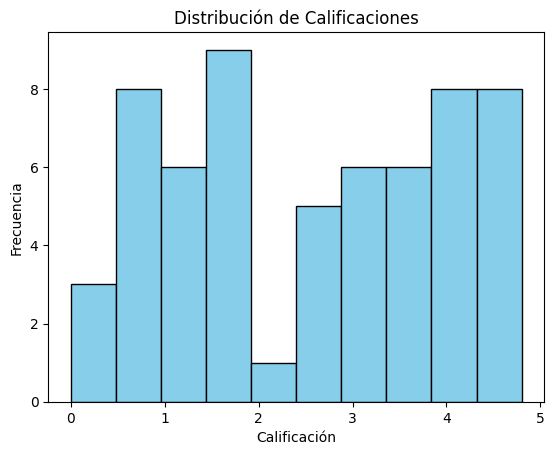

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir timestamp a tipo datetime
df_fact['timestamp'] = pd.to_datetime(df_fact['timestamp'])

# Histograma de distribución de calificaciones
plt.hist(df_fact['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones')
plt.show()


In [22]:
df_premium = df_user.query("subscription == 'Premium'").merge(df_fact, on=['userID'], how='left')
df_premium

,userID,username,country,subscription,movieID,rating,timestamp
0,1002331,user123,USA,Premium,80210920,0.4,2024-01-30 20:45:06
1,1002331,user123,USA,Premium,80192187,1.5,2024-01-26 18:23:45
2,1002331,user123,USA,Premium,81157374,1.9,2024-01-30 17:44:05
3,1002333,techMaster,UK,Premium,80210920,4.8,2024-02-03 07:25:28
4,1002333,techMaster,UK,Premium,80192187,4.8,2024-02-07 22:58:17
5,1002333,techMaster,UK,Premium,81157374,1.3,2024-01-20 15:17:02
6,1002335,travelBug,Australia,Premium,80210920,0.9,2024-01-22 21:13:27
7,1002335,travelBug,Australia,Premium,80192187,2.0,2024-02-03 19:04:56
8,1002335,travelBug,Australia,Premium,81157374,0.6,2024-01-22 16:51:04
9,1002337,foodie88,Italy,Premium,80210920,1.2,2024-02-11 22:38:56


In [23]:
df_premium.groupby('userID')['rating'].mean()

userID
1002331     1.266667
1002333     3.633333
1002335     1.166667
1002337     1.866667
1002339     2.766667
10023311    3.466667
10023313    2.933333
10023315    2.866667
10023317    1.800000
10023319    4.066667
Name: rating, dtype: float64

In [42]:
df_premium.groupby("country")['rating'].mean()

country
Australia     1.166667
Bahamas       1.800000
Italy         1.866667
Mexico        2.766667
NewZealand    4.066667
Norway        2.866667
SouthKorea    2.933333
Spain         3.466667
UK            3.633333
USA           1.266667
Name: rating, dtype: float64

In [24]:
# Definir el período de tiempo deseado
inicio_periodo = '2024-01-26'
fin_periodo = '2024-01-30'

# Filtrar datos según el período de tiempo
datos_periodo = df_premium[(df_fact['timestamp'] >= inicio_periodo) & (df_premium['timestamp'] <= fin_periodo)]


frecuencia_peliculas = datos_periodo['rating'].mean()
frecuencia_peliculas

/tmp/ipykernel_32/2070103547.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datos_periodo = df_premium[(df_fact['timestamp'] >= inicio_periodo) & (df_premium['timestamp'] <= fin_periodo)]


2.4

In [ ]:
]